In [3]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

### <span style="color:#1E824C">Agenda</span>

The data preparation follows an ELT (Extract, Load, Transform) approach focused on preparing the seafood dataset for analysis. The goal of this process is to ensure that the dataset is clean, structured, and machine-readable. By transforming raw data into a consistent and analytical format, it could uncover patterns related to pricing and profitability and lay the foundation for predictions in future sprints.

### <span style="color:#1E824C">Load Dataset</span>


In [4]:
dataset = r'..\data\seafood_Dataset.csv'
df = pd.read_csv(dataset, header=0)

### <span style="color:#1E824C"> Inspect the data</span>
In this section I will inspect the dataset, to get a better understanding before cleaning it. 

The focus here, is to understand the looks of the dataset, checking for missing values or duplicated row and to get a look at the colmuns and ranges

In [5]:
# View first 5 rows
df.head()

,name,type,price_dk,season_availability,weight_g,length_cm,width_cm,height_cm,year,freight_charge
0,Lyssej,fish,107.531809,Summer,574.507123,33.224353,7.311002,6.298232,2020,14.285363
1,Rødspætte,fish,102.468819,Winter,479.260355,51.941094,10.657907,12.882443,2023,11.796275
2,Stenbider,fish,122.502041,Winter,597.153281,30.188345,12.375578,8.874254,2023,14.126350
3,Helt,fish,132.702067,Summer,728.454478,35.355957,8.288079,8.184110,2024,7.753747
4,Norske_kammusling_i_skal,fish,77.072308,Spring,464.876994,44.620609,12.557406,8.952481,2024,14.124236


In [6]:
# View last 5 rows
df.tail()

,name,type,price_dk,season_availability,weight_g,length_cm,width_cm,height_cm,year,freight_charge
2276,Makrel,fish,88.674416,Winter,601.905992,43.601642,8.265660,10.754670,2024,10.767912
2277,Knurhane,fish,75.286013,Autumn,327.680895,34.623542,9.225974,3.616043,2023,8.204586
2278,Canadisk_hummer,fish,96.511926,Autumn,599.946875,46.554038,8.091329,5.155531,2022,8.560669
2279,Laks_vild,fish,99.042254,Summer,569.388694,29.298084,8.304819,9.363268,2024,6.530772
2280,Blåmusling,shellfish,62.871922,Autumn,241.128991,57.190406,15.613223,8.028217,2022,13.248310


In [7]:
# Returns the number of rows and columns
df.shape

(2281, 10)

In [8]:
# Shows all column names
df.columns

Index(['name', 'type', 'price_dk', 'season_availability', 'weight_g',
       'length_cm', 'width_cm', 'height_cm', 'year', 'freight_charge'],
      dtype='object')

In [9]:
# 	Shows types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2281 non-null   object 
 1   type                 2281 non-null   object 
 2   price_dk             2281 non-null   float64
 3   season_availability  2281 non-null   object 
 4   weight_g             2281 non-null   float64
 5   length_cm            2281 non-null   float64
 6   width_cm             2281 non-null   float64
 7   height_cm            2281 non-null   float64
 8   year                 2281 non-null   int64  
 9   freight_charge       2281 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 178.3+ KB


In [10]:
# Show count, mean, std, min, max (numeric only by default)
df.describe()

,price_dk,weight_g,length_cm,width_cm,height_cm,year,freight_charge
count,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000,2281.000000
mean,95.653105,504.962161,39.819003,9.897655,8.042840,2021.967558,11.409940
std,21.338034,147.757774,10.026928,3.021083,2.054648,1.397303,4.344573
min,27.202110,100.000000,10.000000,2.000000,1.000000,2020.000000,2.300000
25%,81.138746,405.992416,32.880268,7.888869,6.663090,2021.000000,8.372433
50%,95.850111,503.676526,39.944040,9.882514,8.015456,2022.000000,11.362903
75%,109.989553,600.929185,46.515220,11.978594,9.424964,2023.000000,14.368219
max,177.035415,1077.909724,79.262377,19.338731,15.058110,2024.000000,27.037734


In [11]:
# Shows missing values pr. column
df.isnull().sum()

name                   0
type                   0
price_dk               0
season_availability    0
weight_g               0
length_cm              0
width_cm               0
height_cm              0
year                   0
freight_charge         0
dtype: int64

In [12]:
# Count of unique entries pr. column
df.nunique()

name                     45
type                      2
price_dk               2281
season_availability       4
weight_g               2273
length_cm              2281
width_cm               2270
height_cm              2279
year                      5
freight_charge         2241
dtype: int64

In [13]:
# Count duplicate rows
df.duplicated().sum()

0

In [14]:
# See all column data types
df.dtypes

name                    object
type                    object
price_dk               float64
season_availability     object
weight_g               float64
length_cm              float64
width_cm               float64
height_cm              float64
year                     int64
freight_charge         float64
dtype: object

### <span style="color:#1E824C"> Clean the data</span>
This section are focusing on cleaning the data by renaming confusing columns for clarity, add columns if needed and convert categorical columns to numeric varables, so that they can be used in machine learning algorithms.
This cleaning process ensures that the dataset is structured, consistent, and ready for modeling. It forms the foundation for reliable insights and accurate predictions in the next phases of the project.

### <span style="color:#1E824C"> Transform the data</span>
* Renaming price_dk and freight_charge 
* Adding Profit column
* sorting year column

In [17]:
df.rename(columns={'price_dk': 'price_kr', 'freight_charge': 'freight_charge_kr'}, inplace=True)

In [18]:
# Calculate the profit for each row and add column:
df['profit_kr'] = df['price_kr'] - df['freight_charge_kr']

In [19]:
df[['price_kr', 'freight_charge_kr', 'profit_kr']].head()

,price_kr,freight_charge_kr,profit_kr
0,107.531809,14.285363,93.246446
1,102.468819,11.796275,90.672545
2,122.502041,14.126350,108.375691
3,132.702067,7.753747,124.948320
4,77.072308,14.124236,62.948072


In [20]:
print(df.columns.tolist())

['name', 'type', 'price_kr', 'season_availability', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'year', 'freight_charge_kr', 'profit_kr']


In [26]:
# Sort the year from 2024 - 2020, and rest the index.
df = df.sort_values(by="year", ascending=False).reset_index(drop=True)

In [27]:
df.head()

,price_kr,weight_g,length_cm,width_cm,height_cm,year,freight_charge_kr,profit_kr,name_Aborre,name_Blåmusling,...,name_Stenbider,name_Torsk,name_Ørred,name_Østers,type_fish,type_shellfish,season_availability_Autumn,season_availability_Spring,season_availability_Summer,season_availability_Winter
0,89.844799,666.227423,34.360525,12.081770,9.611149,2024,9.048953,80.795846,False,False,...,False,False,False,False,True,False,False,False,False,True
1,111.064185,417.419473,60.979393,11.658716,7.399742,2024,13.739474,97.324712,False,False,...,False,False,False,False,False,True,False,False,True,False
2,114.343755,647.403648,35.488411,10.836399,10.378453,2024,13.674143,100.669612,False,False,...,False,False,False,False,True,False,False,True,False,False
3,97.224685,381.137012,49.731016,9.934430,6.517004,2024,6.816032,90.408652,False,False,...,False,False,False,False,True,False,False,False,False,True
4,99.448114,375.915358,58.093063,10.915729,9.626561,2024,12.765011,86.683103,False,False,...,False,False,False,False,True,False,False,False,True,False


In [28]:
df.tail()

,price_kr,weight_g,length_cm,width_cm,height_cm,year,freight_charge_kr,profit_kr,name_Aborre,name_Blåmusling,...,name_Stenbider,name_Torsk,name_Ørred,name_Østers,type_fish,type_shellfish,season_availability_Autumn,season_availability_Spring,season_availability_Summer,season_availability_Winter
2276,89.766901,478.386867,26.504238,8.947665,6.913159,2020,7.851182,81.915719,False,False,...,False,False,False,False,True,False,False,True,False,False
2277,90.089323,449.437104,30.141962,13.244542,9.514064,2020,19.217077,70.872246,False,False,...,False,False,False,False,False,True,True,False,False,False
2278,77.615441,407.989600,37.158449,10.112626,7.494750,2020,5.673493,71.941948,False,False,...,False,True,False,False,True,False,False,False,True,False
2279,89.159429,454.629547,51.947629,13.275416,1.516972,2020,6.947606,82.211823,False,False,...,False,False,False,False,True,False,False,False,False,True
2280,91.025034,455.365474,39.227790,10.175111,11.778558,2020,15.012873,76.012161,False,False,...,False,False,False,False,True,False,False,False,True,False


#### <span style="color:#1E824C"> Convert data types</span>
* name
* type
* season_availability

In [29]:
# Convert each object into new binary
df = pd.get_dummies(df, columns=['name', 'type', 'season_availability'], drop_first=False)

KeyError: "None of [Index(['name', 'type', 'season_availability'], dtype='object')] are in the [columns]"

In [30]:
df.columns

Index(['price_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'year',
       'freight_charge_kr', 'profit_kr', 'name_Aborre', 'name_Blåmusling',
       'name_Canadisk_hummer', 'name_Dansk_10-armet_blæksprutte',
       'name_Fjordreje', 'name_Fjæsing', 'name_Flodkrebs', 'name_Gedde',
       'name_Havkat', 'name_Havtaske', 'name_Helleflynder', 'name_Helt',
       'name_Hornfisk', 'name_Hvilling', 'name_Ising', 'name_Jomfruhummer',
       'name_Knude', 'name_Knurhane', 'name_Kuller', 'name_Kulmule',
       'name_Laks_vild', 'name_Lange', 'name_Levende_norsk_kongekrabbe',
       'name_Line_blåmusling', 'name_Lyssej', 'name_Makrel', 'name_Multe',
       'name_Mørksej', 'name_Nordsøreje', 'name_Norske_kammusling_i_skal',
       'name_Pighvar', 'name_Rødspætte', 'name_Rødtunge', 'name_Sandart',
       'name_Signalkrebs', 'name_Sild', 'name_Skrubbe', 'name_Skærising',
       'name_Slethvar', 'name_Smelt', 'name_Sort_hummer', 'name_Stenbider',
       'name_Torsk', 'name_Ørred', 'name_Øst

### <span style="color:#1E824C"> Data Exploration & Visualizations</span>
In this section, I will explore the dataset to better understand its structure and identify patterns that could influence pricing and profitability. I will calculate descriptive statistics for the numeric data to get an overview of central tendencies, variability, and possible oddity. I will then create targeted visualizations to support our exploration to get insights in which features to include in future predictive models and dashboards.

#### <span style="color:#1E824C"> Dependent and Independent varibles</span>


In [31]:
dependent = ['price_kr','profit_kr']
all_independent = [col for col in df.columns if col not in ['price_kr', 'profit_kr']]
print("All Independent variables:")
all_independent

All Independent variables:


['weight_g',
 'length_cm',
 'width_cm',
 'height_cm',
 'year',
 'freight_charge_kr',
 'name_Aborre',
 'name_Blåmusling',
 'name_Canadisk_hummer',
 'name_Dansk_10-armet_blæksprutte',
 'name_Fjordreje',
 'name_Fjæsing',
 'name_Flodkrebs',
 'name_Gedde',
 'name_Havkat',
 'name_Havtaske',
 'name_Helleflynder',
 'name_Helt',
 'name_Hornfisk',
 'name_Hvilling',
 'name_Ising',
 'name_Jomfruhummer',
 'name_Knude',
 'name_Knurhane',
 'name_Kuller',
 'name_Kulmule',
 'name_Laks_vild',
 'name_Lange',
 'name_Levende_norsk_kongekrabbe',
 'name_Line_blåmusling',
 'name_Lyssej',
 'name_Makrel',
 'name_Multe',
 'name_Mørksej',
 'name_Nordsøreje',
 'name_Norske_kammusling_i_skal',
 'name_Pighvar',
 'name_Rødspætte',
 'name_Rødtunge',
 'name_Sandart',
 'name_Signalkrebs',
 'name_Sild',
 'name_Skrubbe',
 'name_Skærising',
 'name_Slethvar',
 'name_Smelt',
 'name_Sort_hummer',
 'name_Stenbider',
 'name_Torsk',
 'name_Ørred',
 'name_Østers',
 'type_fish',
 'type_shellfish',
 'season_availability_Autumn',
 '

#### <span style="color:#1E824C"> Visualize features - Focus on price and profit </span>
Scatterplot
* Price vs Weight
* Price vs Profit
* Price vs Freight charge
* Profit by Season
* Profit by Year

Boxplot: 
* Price by Year
* Price by Season
* Profit by Year
* Profit bt Season


Correlation Matrix:
* Factors That Influence Price
* Factors That Influence Profitability

##### <span style="color:#1E824C"> Scatterplot </span>


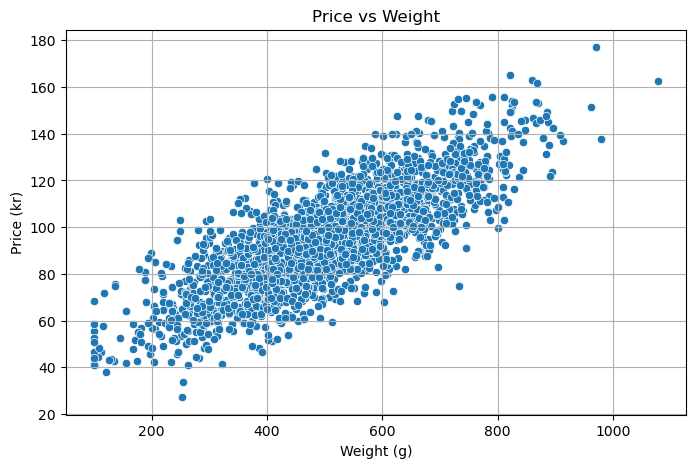

In [39]:
# Price vs Weight and save for dashboard 
fig, ax = plt.subplots(figsize=(8, 5))  
sbn.scatterplot(data=df, x='weight_g', y='price_kr', ax=ax)  # Use the ax explicitly
ax.set_title('Price vs Weight')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Price (kr)')
ax.grid(True)
fig.savefig("weight_vs_price.png", bbox_inches="tight")
plt.show()

The scatter plot shows the relationship between seafood weight (g) and price (kr). There is a clear positive trend: as the weight increases, the price also tends to increase. The points form a dense cluster, indicating a strong correlation between the two variables, although some outliers and variation are also present.

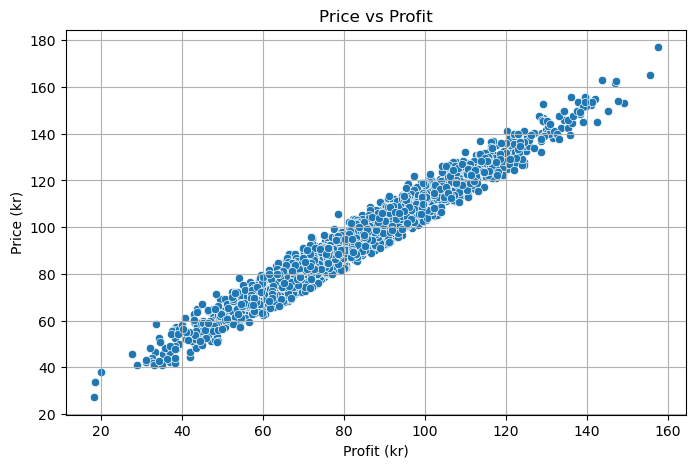

In [37]:
# Price vs Profit and save for dashboard 
fig, ax = plt.subplots(figsize=(8, 5))  
sbn.scatterplot(data=df, x='profit_kr', y='price_kr', ax=ax)  # Use the ax explicitly
ax.set_title('Price vs Profit')
ax.set_xlabel('Profit (kr)')
ax.set_ylabel('Price (kr)')
ax.grid(True)
fig.savefig("profitt_vs_price.png", bbox_inches="tight")
plt.show()

This graph shows the relationship between profit (kr) and price (kr) for seafood products. There is a strong positive linear trend: as the profit increases, the price also increases. The data points follow a tight line, indicating a highly linear correlation between profit and price, suggesting that pricing is strongly influenced by profit margins.

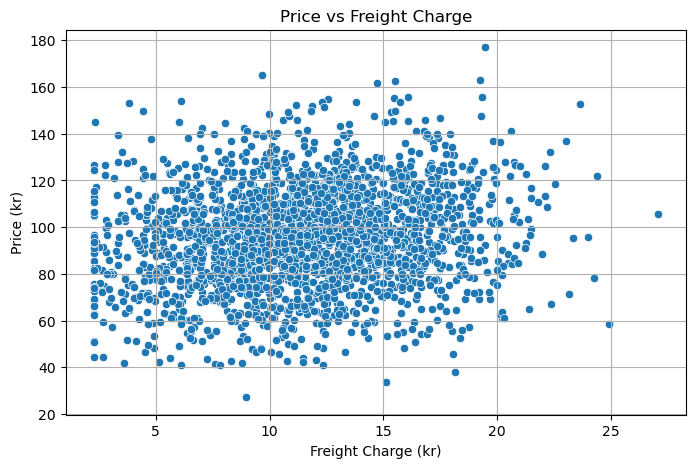

In [40]:
# Price vs Freight Charge
fig, ax = plt.subplots(figsize=(8, 5))  
sbn.scatterplot(data=df, x='freight_charge_kr', y='price_kr', ax=ax)  # Use the ax explicitly
ax.set_title('Price vs Freight Charge')
ax.set_xlabel('Freight Charge (kr)')
ax.set_ylabel('Price (kr)')
ax.grid(True)
fig.savefig("freight_charge_vs_price.png", bbox_inches="tight")
plt.show()

This scatter plot shows the relationship between freight charge (kr) and seafood price (kr). There is no clear pattern or trend in the data, as the points are widely scattered across the plot. This suggests that freight charge does not have a strong or direct influence on the price of the products, and other factors are likely more important in determining pricing

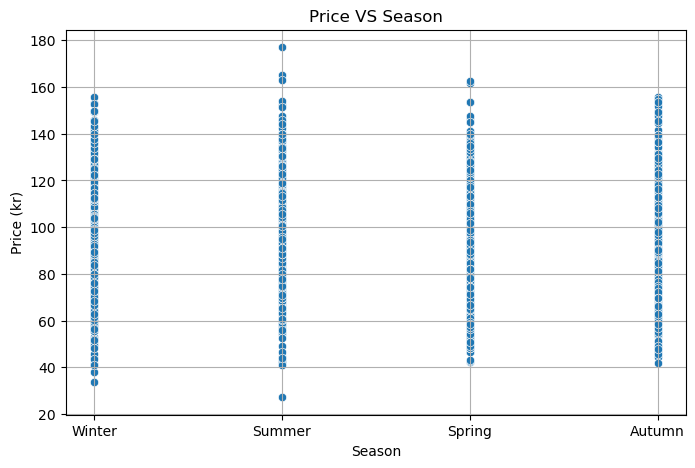

In [42]:
season_cols = ['season_availability_Autumn', 'season_availability_Spring', 'season_availability_Summer', 'season_availability_Winter']
df['season'] = df[season_cols].idxmax(axis=1).str.replace('season_availability_', '')

fig, ax = plt.subplots(figsize=(8, 5))  
sbn.scatterplot(data=df, x='season', y='price_kr', ax=ax)  # Use the ax explicitly
ax.set_title('Price VS Season')
ax.set_xlabel('Season')
ax.set_ylabel('Price (kr)')
ax.grid(True)
fig.savefig("season_VS_price_kr.png", bbox_inches="tight")
plt.show()

The graph shows the distribution of price (kr) across the four seasons: Winter, Summer, Spring, and Autumn. Prices appear to be evenly distributed within each season, with no significant difference in price levels between them. Summer might have slightly higher peak prices while Spring may have a slightly lower upper price range. But this suggests mainly that seasonality does not have a strong impact on pricing, and seafood prices remain relatively stable throughout the year.


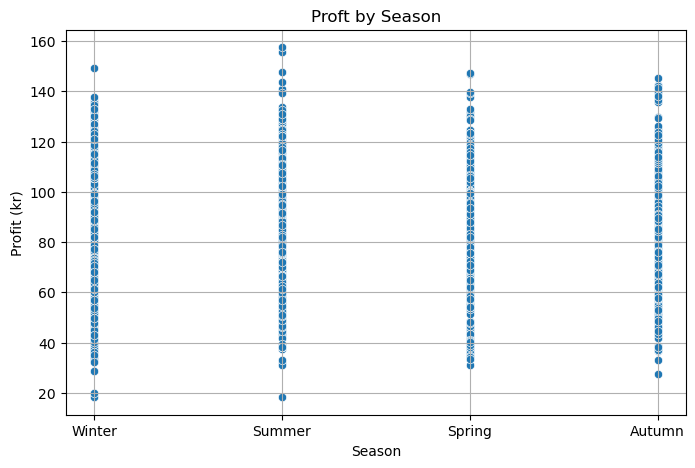

In [43]:
# Profit by Season

fig, ax = plt.subplots(figsize=(8, 5))  
sbn.scatterplot(data=df, x='season', y='profit_kr', ax=ax)  # Use the ax explicitly
ax.set_title('Proft by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Profit (kr)')
ax.grid(True)
fig.savefig("season_by_profit.png", bbox_inches="tight")
plt.show()

This plot shows the distribution of profit (kr) across the four seasons: Winter, Summer, Spring, and Autumn. The data points are relatively evenly spread within each season, indicating that profit levels are similar across all seasons. This means that there is no clear seasonal trend and therefor suggesting that the seasons does not strongly affect profit in this dataset.

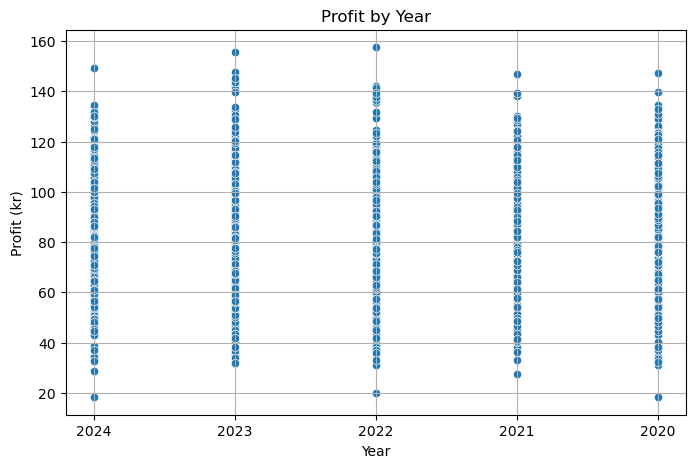

In [ ]:
# Profit by Year
df['year'] = df['year'].astype(str) #convert year to string

fig, ax = plt.subplots(figsize=(8, 5))  
sbn.scatterplot(data=df, x='year', y='profit_kr', ax=ax)
ax.set_title('Profit by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Profit (kr)')
ax.grid(True)
fig.savefig("year_by_profit.png", bbox_inches="tight")
plt.show()

This graph shows the distribution of profit (kr) for seafood products across the years 2020 to 2024.
Profit levels appear fairly consistent each year, with most values clustered between 30 and 140 DKK.
There is no clear increasing or decreasing trend over time, indicating that profitability has remained stable across the five-year period.

##### <span style="color:#1E824C"> Boxplot </span>
Categorical variables only
* Price by Year
* Price by Season
* Profit by Year
* Profit by Seson



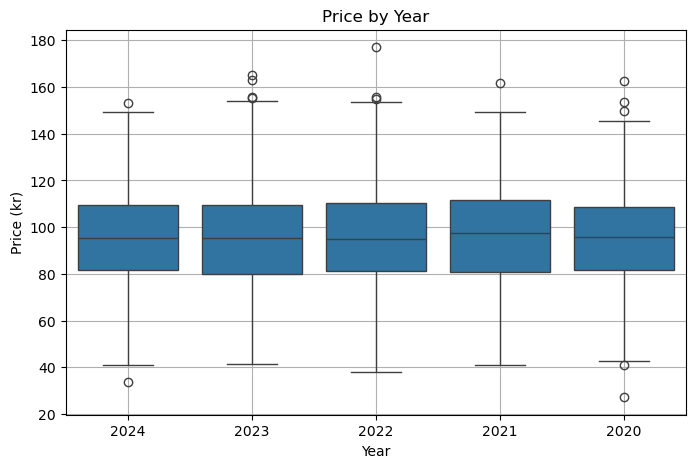

In [47]:
# Price by Year
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='year', y='price_kr')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.savefig("price_by_year_boxplot.png", bbox_inches="tight")
plt.show()

This boxplot shows the distribution of seafood prices(kr) for each year from 2024 to 2020.The median price is fairly consistent across all years, around 95–100 kr, indicating stable pricing over time. The interquartile range (IQR) is similar across years, showing that the variation in prices remained steady.
Each year has several outliers, both low and high. 2020 stands out the most with both low and high outliersbut. But the years do not have extreme deviations. The maximum and minimum  values are also aligned year to year, suggesting no major changes in overall price trends.

The Seafood prices remained relatively stable over the five-year period, with similar variability and a consistent central price point. The presence of outliers reflects occasional unusually high or low prices, but they do not disrupt the overall pattern.

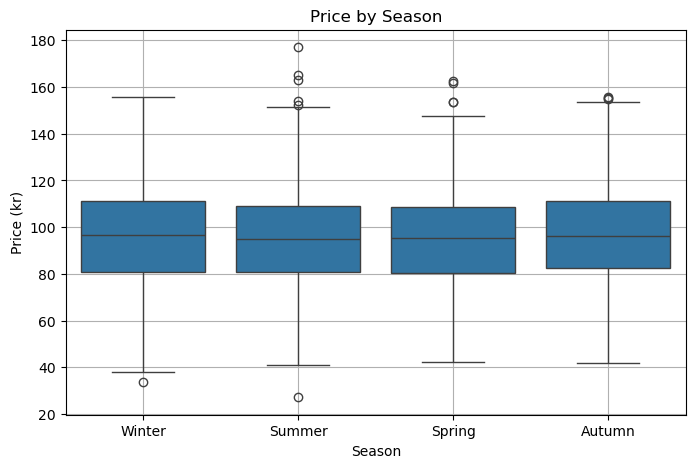

In [48]:
# Price by Season
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='season', y='price_kr')
plt.title('Price by Season')
plt.xlabel('Season')
plt.ylabel('Price (kr)')
plt.grid(True)
plt.savefig("price_by_season_boxplot.png", bbox_inches="tight")
plt.show()

This boxplot shows the distribution of seafood prices (kr) for each season: Winter, Summer, Spring, and Autumn.
The median price is fairly consistent across all seasons, indicating that seafood prices do not fluctuate significantly based on the season.
The interquartile range (IQR), is also similar across seasons, showing a stable variation in price regardless of the time of year.

Each season contains a number of outliers, both high and low.
Summer stands out slightly with a few very high outliers, while Winter show some lower price outliers. Despite this, these outliers are not extreme enough to indicate a major seasonal pricing shift.

Overall, seafood prices appear relatively stable across all four seasons, with consistent median values and comparable variability.

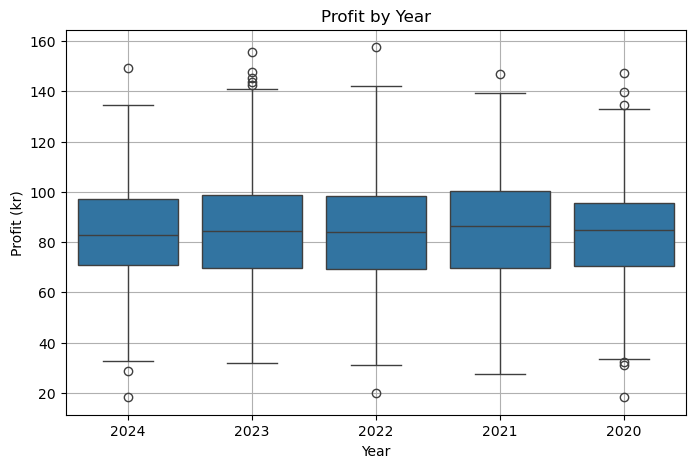

In [50]:
# Profit by Year
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='year', y='profit_kr')
plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit (kr)')
plt.grid(True)
plt.savefig("profit_by_year_boxplot.png", bbox_inches="tight")
plt.show()

This boxplot shows the distribution of seafood profit (kr) for each year from 2024 to 2020.
The median profit is quite consistent across the years, suggesting that seafood profitability has remained stable over time. The interquartile range (IQR), is similar for all years, indicating steady variability in profit.

Each year shows a number of outliers, both low and high:

1. 2024 and 2022 display some of the lowest outliers

2. 2023 stands out slightly with several clustered high-profit outliers

3. 2020 also includes a group of low-profit outliers, slightly more than some other years.

Despite these outliers, the overall range and distribution of profit remain comparable each year.
This suggests that while occasional extreme values occur, they do not significantly disrupt the overall pattern of stable profit levels across the five-year period.

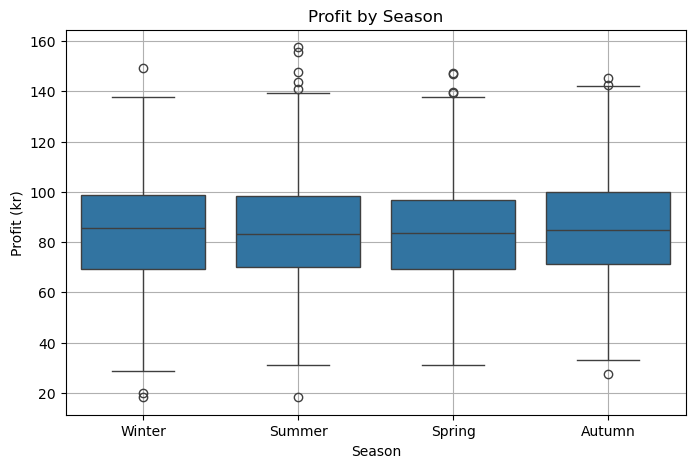

In [ ]:
# Profit by season
plt.figure(figsize=(8, 5))
sbn.boxplot(data=df, x='season', y='profit_kr')
plt.title('Profit by Season')
plt.xlabel('Season')
plt.ylabel('Profit (kr)')
plt.grid(True)
plt.savefig("profit_by_season_boxplot.png", bbox_inches="tight")
plt.show()

This boxplot shows the distribution of seafood profit (kr) for each season: Winter, Summer, Spring, and Autumn.
The median profit remains fairly stable across all seasons, which suggests that profitability is generally consistent throughout the year.
The interquartile range (IQR) is also similar for each season, indicating that the spread of profit values is fairly even across time periods.

Each season contains a few outliers, both low and high.

1. Summer and Spring show slightly more high profit outliers.

2. Winter has several low outliers, similar to Summer.

3. Autumn and winter appears to have a slightly higher median.

Despite these small differences, the overall pattern shows that profitability does not vary dramatically between seasons.
The outliers reflect occasional unusually high or low profits, but the main distribution stays steady, suggesting a stable and balanced profit performance year-round.

##### <span style="color:#1E824C"> Correlation Heatmap </span>
* Factors influencing Price
* Factors influencing Profit

In [71]:
## Create the correlation matrix (only for numeric columns)
influencing_price = ['price_kr', 'profit_kr',
    'weight_g', 'length_cm', 'width_cm', 'height_cm',
    'freight_charge_kr', 'year','season_availability_Spring', 'season_availability_Summer',
    'season_availability_Autumn', 'season_availability_Winter']
correlation_matrix = df[influencing_price].corr(numeric_only=True)

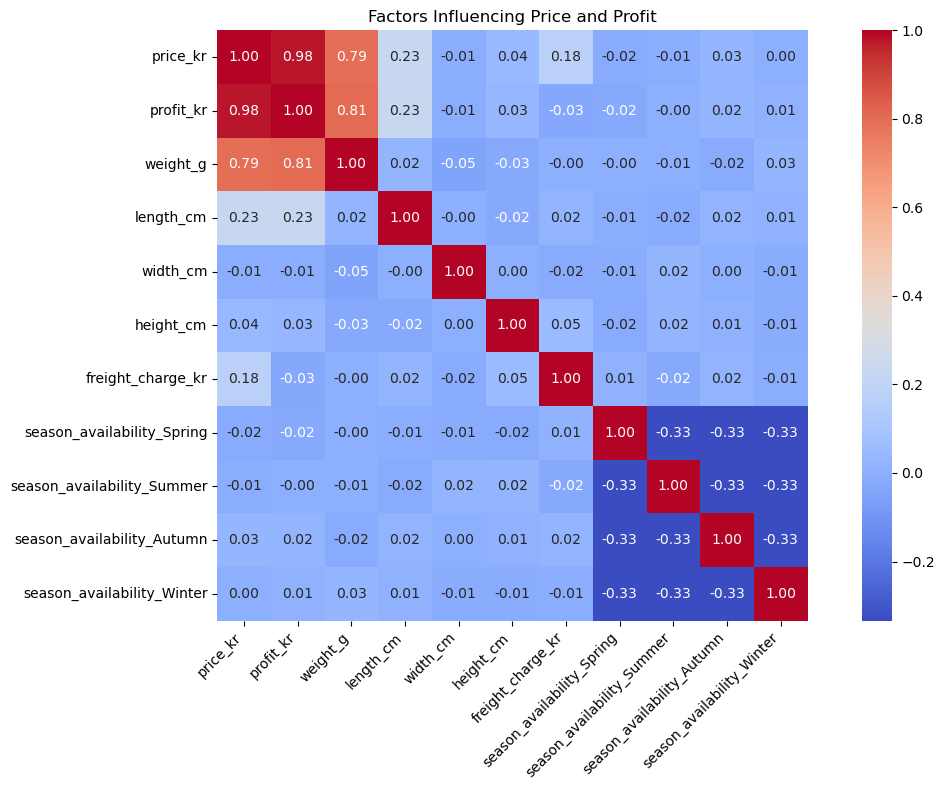

In [72]:
# Plot and save heatmap
plt.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Factors Influencing Price and Profit')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("factors_influencing_price_and_profit_heatmap.png", bbox_inches="tight")
plt.show()

The heatmap illustrates the correlation between numeric features and their relationship with price_kr and profit_kr.

Strongest Influencers: 
The price_kr and profit_kr are very strongly correlated, meaning profit is largely determined by price. Both are also strongly correlated with weight_g, indicating that heavier seafood products tend to cost more and have higher profits.

Weak or No Influence:
The variables like length_cm, width_cm, and height_cm show very weak or no correlation with price or profit, suggesting size dimensions are not key pricing drivers. The freight_charge_kr shows low positive correlation (0.18) with price, meaning transport costs may have a small influence on pricing, but not significantly. The seasonal dummy variables have no significant correlation with price or profit. They are negatively correlated with each other, which is expected, as each product can only belong to one season at a time.

#### <span style="color:#1E824C">  Check the distribution of the values of the attributes</span>
* price_kr
* profit_kr
* weight_g
* freight_charge_kr

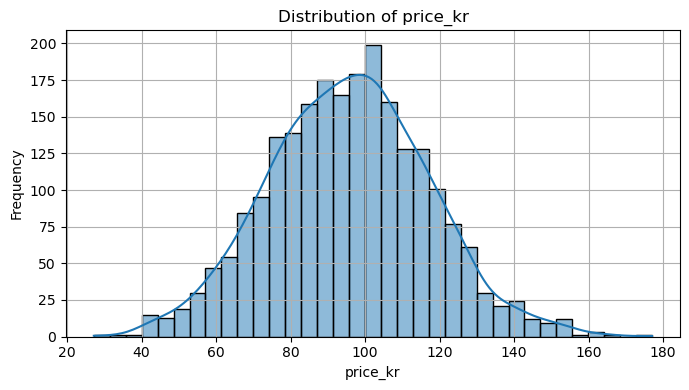

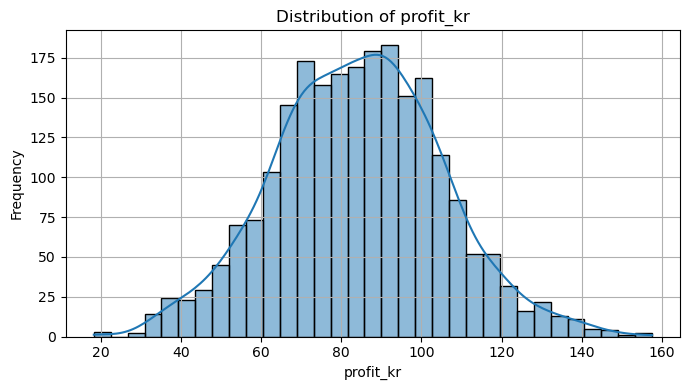

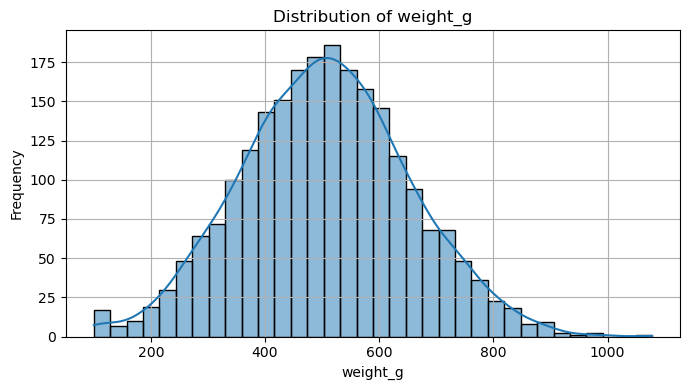

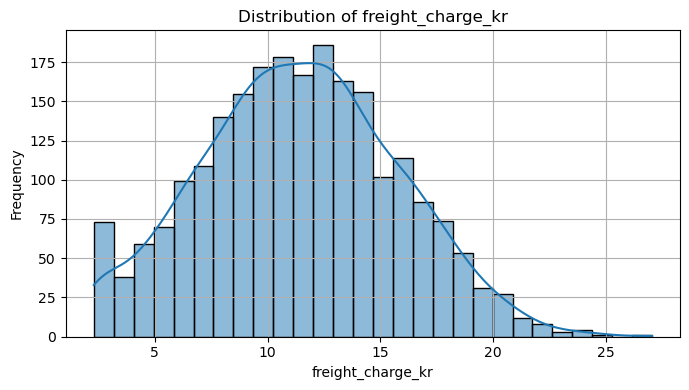

In [74]:
    cols = ['price_kr', 'profit_kr', 'weight_g', 'freight_charge_kr']

    for col in cols:
        plt.figure(figsize=(7, 4))
        sbn.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

### <span style="color:#1E824C">  Distribution output </span>
* **'price_kr':**
    The distribution is slightly right-skewed, with most seafood prices clustered around 90–100 kr. There’s a clear central peak, but also a long right tail, indicating the presence of higher-priced items. This suggests a standard pricing strategy with some premium outliers.

* **'profit_kr':**
    This distribution is close to normal, centered around 85–95 kr, which indicates that most products are profitable. The shape shows a healthy and stable profit margin, with fewer extreme outliers compared to price.
    
* **'weight_g':**
   The distribution is nearly symmetrical and bell-shaped, meaning that most products fall within a balanced weight range around 500–600g. Extremely light or heavy items are rare, suggesting a standard product size across offerings.

* **'freight_charge_kr':**
    The distribution has a peak between 10–14 kr. Most products have relatively low and consistent freight charges, but a few outliers exist on the higher end, possibly due to size, distance, or transport type.

### <span style="color:#1E824C">  Handle outliers </span>

In [76]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Filter out rows where the column value is outside bounds
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [77]:
df = remove_outliers_iqr(df, cols)

In [78]:
print("Cleaned DataFrame shape:", df.shape)


Cleaned DataFrame shape: (2235, 60)


#### <span style="color:#1E824C">  Scale the data </span>
In this section, I scale the numeric features to ensure they are on the same scale, which is important for machine learning models.
The scaled variables are:
* weight_g
* freight_charge_kr
* price_kr

The scaled dataset will be used to train a supervised machine learning model that predicts profit_kr using Multiple Linear Regression


In [79]:
scaler = StandardScaler()

scale_cols = ['weight_g', 'freight_charge_kr', 'profit_kr']

df[scale_cols] = scaler.fit_transform(df[scale_cols])

### <span style="color:#1E824C"> Save the cleaned dataset </span>

In [80]:
df = df.drop(columns=['season']) 

In [ ]:
df.to_csv(r'..\data\cleaned_fish_shellfish_dataset.csv', index=False)


In [82]:
df.columns

Index(['price_kr', 'weight_g', 'length_cm', 'width_cm', 'height_cm', 'year',
       'freight_charge_kr', 'profit_kr', 'name_Aborre', 'name_Blåmusling',
       'name_Canadisk_hummer', 'name_Dansk_10-armet_blæksprutte',
       'name_Fjordreje', 'name_Fjæsing', 'name_Flodkrebs', 'name_Gedde',
       'name_Havkat', 'name_Havtaske', 'name_Helleflynder', 'name_Helt',
       'name_Hornfisk', 'name_Hvilling', 'name_Ising', 'name_Jomfruhummer',
       'name_Knude', 'name_Knurhane', 'name_Kuller', 'name_Kulmule',
       'name_Laks_vild', 'name_Lange', 'name_Levende_norsk_kongekrabbe',
       'name_Line_blåmusling', 'name_Lyssej', 'name_Makrel', 'name_Multe',
       'name_Mørksej', 'name_Nordsøreje', 'name_Norske_kammusling_i_skal',
       'name_Pighvar', 'name_Rødspætte', 'name_Rødtunge', 'name_Sandart',
       'name_Signalkrebs', 'name_Sild', 'name_Skrubbe', 'name_Skærising',
       'name_Slethvar', 'name_Smelt', 'name_Sort_hummer', 'name_Stenbider',
       'name_Torsk', 'name_Ørred', 'name_Øst